# Part 7 of Quick Start: Heat Maps & Colors

This page is primarily based on the following page at the Circos documentation site:

- [7. Heat Maps & Colors](http://circos.ca/documentation/tutorials/quick_start/axes_and_backgrounds/)

That page is found as part number 7 of the nine part [the 'QUICK START' section](http://circos.ca/documentation/tutorials/quick_start/) of [the larger set of Circos tutorials](http://circos.ca/documentation/tutorials/).

Go back to Part 6 by clicking [here &#8592;](Quick_Start_Part6.ipynb).

----



## HEAT MAPS AND COLORS

This is the sevent step in the series of nine Quick Guide tutorials. 

This is the third type of track that Martin illustrates adding.

The following is adapted from the documentation page:

Heat maps are used for data types which associate a value with a genomic position, or region. As such, this track uses the same data format as histograms.

The track linearly maps a range of values `[min,max]` onto a list of colors `c[n], i=0..N`.
    
```ini
f = (value - min) / ( max - min )
n = 0      if f < 0 
    N      if f > 1 
    N * f  otherwise
```

The track shares many of the same format parameters with a histogram. As usual, you need to define the `type, file` and `r0/r1` parameters.

```ini
<plot>
type  = heatmap
file  = data/5/segdup.hs1234.heatmap.txt
r1    = 0.89r
r0    = 0.88r
</plot>
```


### LINEAR VS POWER SCALING

If scale_log_base is used, the mapping is not linear, but a power law

```ini
n = N * f**(1/scale_log_base)
```

When `scale_log_base > 1` the dynamic range for values close to min is expanded. When `scale_log_base < 1` the dynamic range for values close to max is expanded.

```ini
scale_log_base = 5
```

### COLORS

Heat map colors are defined by a combination of CSV or color lists.

In this tutorial, the heat map color range is made up of 5 levels of transparency of chromosome colors, plus a fully opaque version of the color.

```ini
color = hs1_a5,hs1_a4,hs1_a3,hs1_a2,hs1_a1,hs1
```

A large number of colors and color lists are defined by default (see `etc/colors.conf` in the Circos distribution.

#### COMMON COLORS

Common colors (red, green, blue, purple, orange, yellow, grey) are defined in 7 tones. Where possible, these are taken from [Brewer palettes](http://colorbrewer2.org/).

```ini
vvlHUE very very light HUE (e.g. vvlred)
 vlHUE      very light     
  lHUE           light
   HUE
  dHUE           dark
 vdHUE      very dark
vvdHUE very very dark
```

Colors `white` and `black` are also defined, as is `transparent`.

#### CYTOGENETIC BAND COLORS

Colors for conventional cytogenetic band patterns are defined

```ini
gposNNN # NNN = 25, 33, 50, 66, 75, 100
gpos
gvar
gneg
acen
stalk
```

#### HUMAN CHROMOSOME COLOR SCHEME

The UCSC browser uses a conventional color scheme for human chromosomes. These colors are defined as

```ini
chr1
chr2
...
chr22
chrx
chry
chrm
chrun
```

Synonyms with `hs` prefix are also defined (e.g. `chr1` and `hs1`).

Luminance corrected chromosome palettes are defined for L= 70, 80 and 90

```ini
lumLchr* # L=70,80,90   e.g. lum70chr1 lum90chr11
```

#### BREWER PALETTES
All [Brewer palette](http://colorbrewer2.org/) colors are available through the syntax

```ini
PALETTE-N-TYPE-M
```

for color M (M=1..N) in the N-color brewer palette `PALETTE` of type `TYPE (TYPE=seq|div|qual)`. For each `PALETTE`, there are several versions for different values of `N=I..J`.

```ini
        I J

TYPE=seq
blues   3 9 
bugn    3 9 # blue-green
bupu    3 9 # blue-purple
gnbu    3 9 # green-blue
greens  3 9 
greys   3 9
oranges 3 9
orrd    3 9 # orange-red
pubu    3 9 # purple-blue
pubugn  3 9 # purple-blue-green
purd    3 9 # purple-red
purples 3 9
rdpu    3 9 # red-purple
reds    3 9 
ylgn    3 9 # yellow-green
ylgnbu  3 9 # yellow-green-blue
ylorbr  3 9 # yellow-orange-brown
ylorrd  3 9 # yellow-orange-red

  e.g. blues-9-seq-3 (3rd color in 9 color blues palette)
       rdpu-3-seq-1 (1st color in 3 color red-purple sequential palette)

TYPE=div
brbg     3 11 # brown-blue-green
piyg     3 11 # pink-yellow-green
prgn     3 11 # purple-green
puor     3 11 # purple-orange
rdbu     3 11 # red-blue
rdgy     3 11 # red-green
rdylbu   3 11 # red-yellow-blue
rdylgn   3 11 # red-yellow-green
spectral 3 11 # rainbow: red-orange-yellow-green-blue

  e.g. piyg-11-div-2 (2rd color in 11 color pink-yellow-green diverging palette)

TYPE=qual
accent   3 8
dark2    3 8
paired   3 12
pastel1  3 9
pastel2  3 8
set1     3 9
set2     3 8
set3     3 12

  e.g. set1-5-qual-1 (1st color in 5 color set1 qualitative palette)
```

#### PURE HUES

For each pure hue H in HSV space, the color `hueHHH` is defined

```ini
hue000
hue001
hue002
...
hue359
hue360
```

#### COLOR LISTS

Color lists are named sets of colors used for parameters which accept a list (e.g. heat map `color` parameter).

Lists exist for all Brewer palettes, of the format `PALETTE-N-TYPE`. For example, `reds-5-seq`, `spectral-7-div`, and `set3-5-qual` are all lists.

Pure hue lists are available, `hue-sN`, for each hue step of N (e.g. `hue-s2`, `hue-s5`, ...). For example, `hue-s5` list is made up of the colors `hue000`, `hue005`, `hue010`, `hue015`, and so on.

N-color hue lists are available as `hue-N` (e.g. `hue-3`, `hue-10`, ...). For example, `hue-1`0 is made up of the 10 colors `hue000`, `hue036`, `hue07`2, ... `hue324`. It is the same list as `hue-s32`.

#### TRANSPARENCY

Color transparency is specified using the suffix `_aN` for transparency level N. The number of allowable levels is controled by the `auto_alpha_steps` parameter in `etc/image.generic.conf`. By default this is set to 5 which allows for 5 levels of transparency

```ini
green    fully opaque
green_a1 16% transparent
green_a2 33% transparent
green_a3 50% transparent
green_a4 66% transparent
green_a5 83% transparent
```



----

### Generating the plot produced by this example code

The following two cells will generate the plot. The first cell adjusts the current working directory.

In [1]:
%cd ../circos-tutorials-0.67/tutorials/1/7/

/home/jovyan/circos-tutorials-0.67/tutorials/1/7


In [2]:
%%bash
../../../../circos-0.69-6/bin/circos -conf circos.conf

debuggroup summary 0.49s welcome to circos v0.69-6 31 July 2017 on Perl 5.022000
debuggroup summary 0.50s current working directory /home/jovyan/circos-tutorials-0.67/tutorials/1/7
debuggroup summary 0.50s command ../../../../circos-0.69-6/bin/circos -conf circos.conf
debuggroup summary 0.50s loading configuration from file circos.conf
debuggroup summary 0.50s found conf file circos.conf
debuggroup summary 0.71s debug will appear for these features: output,summary
debuggroup summary 0.71s bitmap output image ./circos.png
debuggroup summary 0.71s SVG output image ./circos.svg
debuggroup summary 0.71s parsing karyotype and organizing ideograms
debuggroup summary 0.91s karyotype has 24 chromosomes of total size 3,095,677,436
debuggroup summary 0.91s applying global and local scaling
debuggroup summary 0.93s allocating image, colors and brushes
debuggroup summary 8.40s drawing 4 ideograms of total size 881,626,704
debuggroup summary 8.40s drawing highlights and ideograms
debuggroup summary

Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781, <F> line 23512.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of u

View the plot in this page using the following cell.

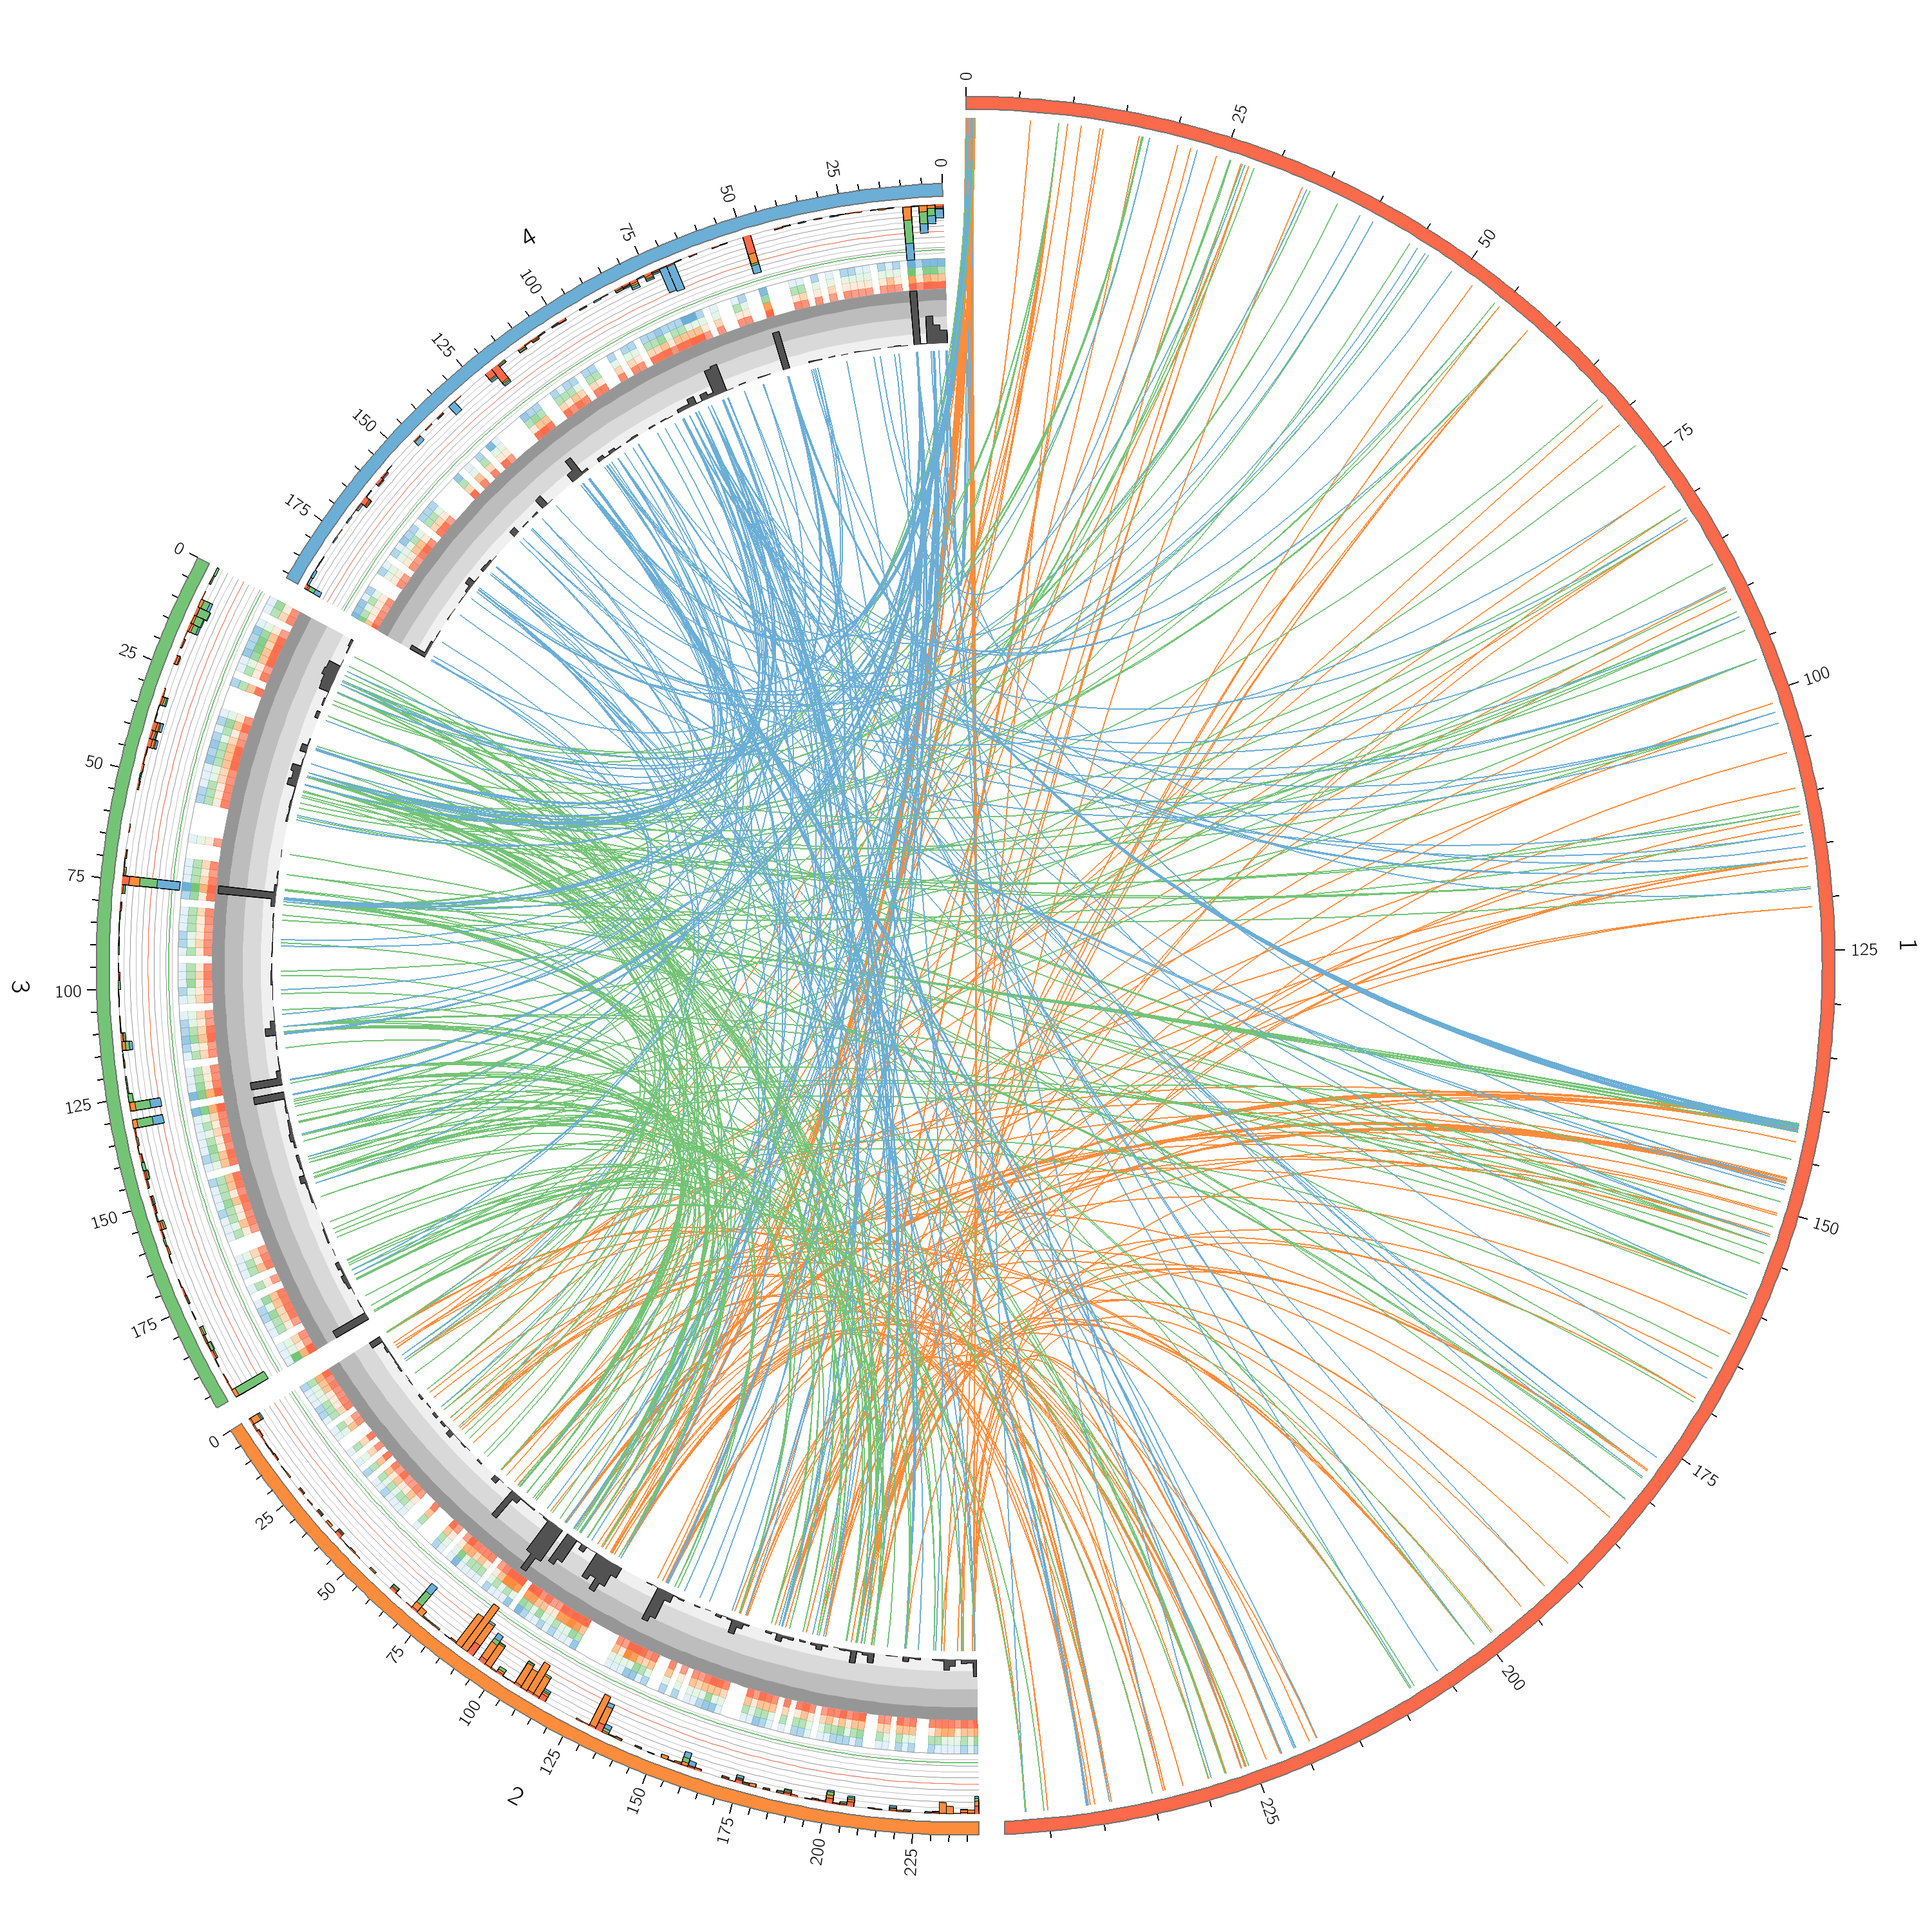

In [3]:
from IPython.display import Image
Image("circos.png")

----

Continue on to the next part of the Quick Start series by clicking [here &#10145;](Quick_Start_Part8.ipynb)</font>. 

----